# Investigating Netflix Movies

## Introduction

Netflix started in 1997 as a DVD rental service and has grown into a major entertainment company. This workbook focuses on the nostalgic films of the 1990s, allowing you to explore Netflix data through exploratory data analysis. As part of a production company specializing in nostalgic styles, you’ll uncover trends and insights from this iconic decade in cinema.

- What was the most frequent movie duration in the 1990s? Save an approximate answer as an integer called duration (use 1990 as the decade's start year).

- A movie is considered short if it is less than 90 minutes. Count the number of short action movies released in the 1990s and save this integer as short_movie_count.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Dataset/netflix_data.csv")

In [2]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB


### Question 1 :  What was the most frequent movie duration in the 1990s?

### Filter Data

First, we filter the data to include only the movies with a release date between 1990 and 1999.

In [4]:
release_90 = df[(df["release_year"] >= 1990) & (df["release_year"] < 2000)]

In [5]:
release_90["release_year"].unique()

array([1997, 1993, 1998, 1996, 1990, 1999, 1991, 1994, 1995, 1992])

In [6]:
release_counts = release_90["release_year"].value_counts()

In [7]:
release_counts

release_year
1997    26
1998    26
1999    26
1993    16
1995    16
1992    16
1996    15
1990    15
1991    14
1994    14
Name: count, dtype: int64

In [8]:
release_90.shape
print(f"There are {release_90.shape[0]} movies released in the 1990s.")

There are 184 movies released in the 1990s.


We successfully obtained a new DataFrame ***release_90*** containing all the movies released in the 1990s, totaling 184 films.

### Find the most frequent movie duration

In [9]:
release_90.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
6,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,119,After one of his high school students attacks ...,Dramas
118,s167,Movie,A Dangerous Woman,Stephen Gyllenhaal,"Debra Winger, Barbara Hershey, Gabriel Byrne, ...",United States,"April 1, 2018",1993,101,At the center of this engrossing melodrama is ...,Dramas
145,s211,Movie,A Night at the Roxbury,John Fortenberry,"Will Ferrell, Chris Kattan, Dan Hedaya, Molly ...",United States,"December 1, 2019",1998,82,"After a run-in with Richard Grieco, dimwits Do...",Comedies
167,s239,Movie,A Thin Line Between Love & Hate,Martin Lawrence,"Martin Lawrence, Lynn Whitfield, Regina King, ...",United States,"December 1, 2020",1996,108,When a philandering club promoter sets out to ...,Comedies
194,s274,Movie,Aashik Awara,Umesh Mehra,"Saif Ali Khan, Mamta Kulkarni, Mohnish Bahl, S...",India,"June 1, 2017",1993,154,"Raised by a kindly thief, orphaned Jimmy goes ...",Dramas


In [10]:
duration_movie = release_90["duration"]

In [11]:
duration_movie

6       119
118     101
145      82
167     108
194     154
       ... 
4672    106
4689    118
4718    106
4746    191
4756    148
Name: duration, Length: 184, dtype: int64

Text(0.5, 1.0, 'duration distribution of the movie')

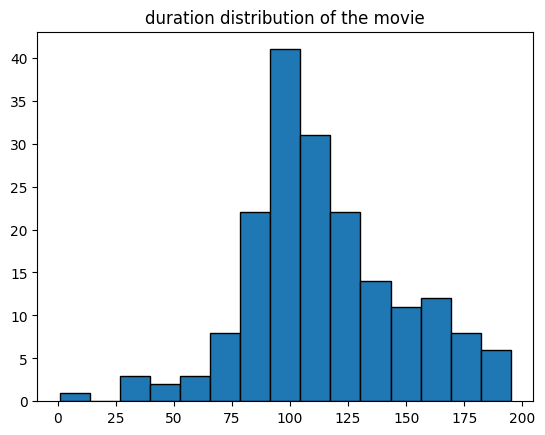

In [12]:
plt.hist(duration_movie, bins=15, edgecolor='black') 
plt.title("duration distribution of the movie")

We can see that the most frequent duration is between 91.53 and 104 minutes.

Another method to calculate the most frequent duration is to use the mode method from pandas.

In [15]:
most_frequent_duration = release_90["duration"].mode()[0]
print(f"The most frequent movie duration is: {most_frequent_duration} minutes.")

The most frequent movie duration is: 94 minutes.


### Questions 2 :
A movie is considered short if it is less than 90 minutes. Count the number of short action movies released in the 1990s and save this integer as short_movie_count.

In [17]:
short_movie = release_90[release_90["duration"] <= 90]

In [20]:
short_movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
145,s211,Movie,A Night at the Roxbury,John Fortenberry,"Will Ferrell, Chris Kattan, Dan Hedaya, Molly ...",United States,"December 1, 2019",1998,82,"After a run-in with Richard Grieco, dimwits Do...",Comedies
333,s487,Movie,An American Tail: Fievel Goes West,"Phil Nibbelink, Simon Wells","Philip Glasser, James Stewart, Erica Yohn, Cat...",United States,"April 1, 2018",1991,75,Fievel and his family head west for what turns...,Children
334,s488,Movie,An American Tail: The Mystery of the Night Mon...,Larry Latham,"Thomas Dekker, Lacey Chabert, Jane Singer, Neh...",United States,"April 1, 2018",1999,75,When a monster goes on a mouse-napping spree i...,Children
428,s624,Movie,Auschwitz: Blueprints of Genocide,Mike Rossiter,Roy Marsden,United Kingdom,"January 19, 2019",1994,49,Newly released KGB files expose evidence provi...,Documentaries
430,s627,Movie,Austin Powers: International Man of Mystery,Jay Roach,"Mike Myers, Elizabeth Hurley, Michael York, Mi...",United States,"December 1, 2019",1997,90,A swingin' fashion photographer by day and a g...,Comedies


In [21]:
short_movie["genre"].value_counts()

genre
Comedies         10
Children          8
Stand-Up          8
Action            7
Dramas            2
Documentaries     1
Docuseries        1
Name: count, dtype: int64

In [19]:
short_movie.shape

(37, 11)

There are 37 movies that are less than 90 minutes long.

In [23]:
short_movie_action = short_movie[short_movie["genre"] == "Action"]

In [26]:
short_movie_action.shape[0]

7

In [25]:
short_movie_action

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1288,s2039,Movie,EVANGELION: DEATH (TRUE)²,Hideaki Anno,"Megumi Ogata, Kotono Mitsuishi, Megumi Hayashi...",Japan,"June 21, 2019",1998,69,"Fifteen years after the Second Impact, apathet...",Action
1698,s2708,Movie,Hero,Corey Yuen,"Takeshi Kaneshiro, Yuen Biao, Valerie Chow, Je...",Hong Kong,"August 1, 2018",1997,89,A pugilist from Shantung struggles to rise to ...,Action
2328,s3718,Movie,"Look Out, Officer",Sze Yu Lau,"Stephen Chow, Bill Tung, Stanley Sui-Fan Fung,...",Hong Kong,"August 16, 2018",1990,88,An officer killed on the job returns to Earth ...,Action
2993,s4787,Movie,Passenger 57,Kevin Hooks,"Wesley Snipes, Bruce Payne, Tom Sizemore, Alex...",United States,"January 1, 2021",1992,84,Air marshal John Cutter must stop notorious te...,Action
3297,s5299,Movie,Rumble in the Bronx,Stanley Tong,"Jackie Chan, Anita Mui, Françoise Yip, Bill Tu...",Hong Kong,"November 1, 2019",1995,89,During a visit to the Bronx to help out at his...,Action
3806,s6114,Movie,The Bare-Footed Kid,Johnnie To,"Aaron Kwok, Lung Ti, Maggie Cheung, Chien-lien...",Hong Kong,"August 16, 2018",1993,83,"While working at a family friend's business, a...",Action
3943,s6330,Movie,The End of Evangelion,"Hideaki Anno, Kazuya Tsurumaki","Megumi Ogata, Kotono Mitsuishi, Megumi Hayashi...",Japan,"June 21, 2019",1997,87,"Seele orders an all-out attack on NERV, aiming...",Action


In [31]:
print(f'There are {short_movie_action.shape[0]} action movies in the dataset')

There are 7 action movies in the dataset
